### standard, min-max, robust 비교 고찰

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

In [10]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1','x2'])
standard_df

,x1,x2
0,-0.687292,0.001745
1,0.184060,-1.344730
2,-0.406435,-0.856810
3,0.741148,0.039605
4,-0.016033,-0.988692
...,...,...
1020,-5.834075,5.222324
1021,-5.512900,5.367984
1022,-5.053469,4.835571
1023,-5.001752,5.420040


In [11]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1','x2'])

In [12]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1','x2'])

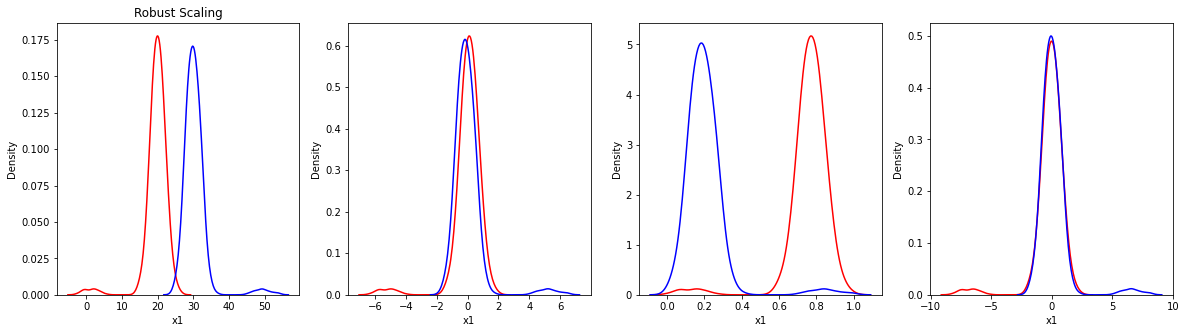

In [35]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')

ax1.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax1.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color='r')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='b')

ax1.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(robust_df['x2'], ax=ax4, color='b')


plt.show()

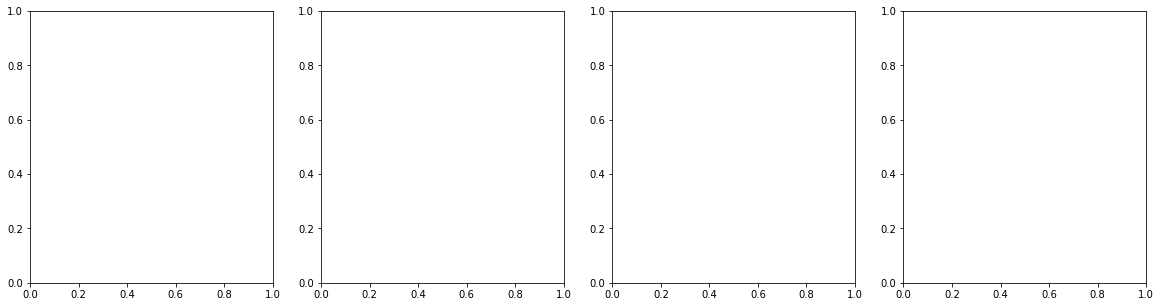

In [36]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

In [84]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### StandardScaler 
* sklearn.preprocessing.StandardScaler
* sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#StandardScaler 로 데이터 셋 변환 , fit() 과 transform()호출
scaler.fit(iris_df)
iris_scaled1 = scaler.transform(iris_df)

#transform()시 sacle 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scales1 = pd.DataFrame(data= iris_scaled1, columns=iris.feature_names)
print(iris_df_scales1.mean())
print(iris_df_scales1.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

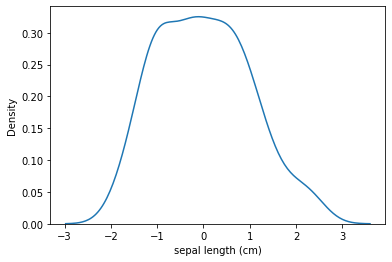

In [78]:
sns.kdeplot(iris_df_scales['sepal length (cm)'])

c:\users\pc1\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


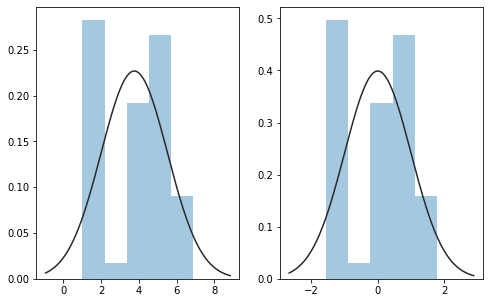

In [59]:
import scipy as sp
import scipy.stats

# 각 값들의 정규 분포 모양 비교비교 
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포 
x0 = iris_df['petal length (cm)'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

x1 = iris_df_scales['petal length (cm)'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
plt.show()

### MinMaxScaler
* sklearn.preprocessing.MinMaxScaler
* sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
scaler.fit(iris_df)
iris_scaled2 = scaler.transform(iris_df)

iris_df_scales2 = pd.DataFrame(data= iris_scaled2, columns=iris.feature_names)
print(iris_df_scales2.max())
print(iris_df_scales2.min())

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


In [88]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
scaler.fit(iris_df)
iris_scaled3 = scaler.transform(iris_df)

iris_df_scales3 = pd.DataFrame(data= iris_scaled3, columns=iris.feature_names)
print(iris_df_scales3.mean())
print(iris_df_scales3.var())

sepal length (cm)    0.033333
sepal width (cm)     0.114667
petal length (cm)   -0.169143
petal width (cm)    -0.067111
dtype: float64
sepal length (cm)    0.405736
sepal width (cm)     0.759918
petal length (cm)    0.254390
petal width (cm)     0.258225
dtype: float64


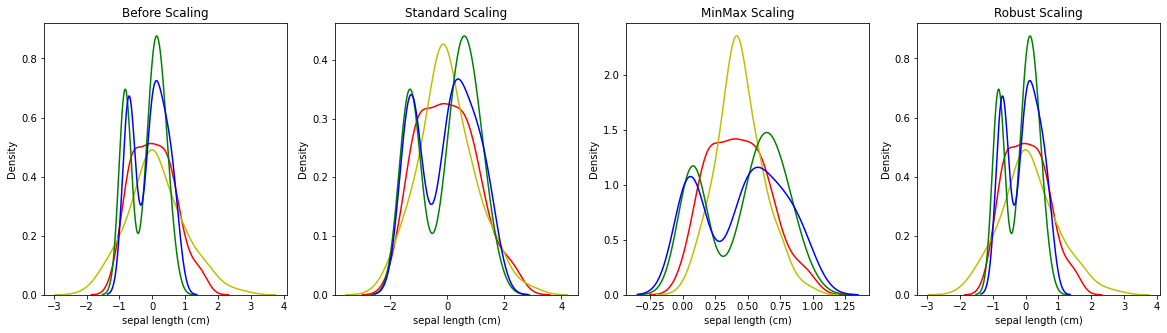

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

ax1.set_title('Before Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax1, color = 'b')

ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scales1['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scales1['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scales1['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scales1['petal width (cm)'], ax = ax2, color = 'b')

ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_scales2['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_scales2['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_scales2['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_scales2['petal width (cm)'], ax = ax3, color = 'b')

ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_scales3['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_scales3['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_scales3['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_scales3['petal width (cm)'], ax = ax4, color = 'b')
plt.show()

name, sib__ , pa__, tic__, fair , passenger 빼고서 하기
feature , label 분리 (survive= label)
data read
전처리
문자열 encoding
scaling
